<a href="https://colab.research.google.com/github/ankitha-dudla/nyc-taxi-trip-time-prediction/blob/main/ankitha_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##                 **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Importing all the important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import seaborn as sns;sns.set()



In [ ]:
# lets import the dataset
df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data modified.csv')

In [ ]:
df.head()

id  vendor_id   pickup_datetime  dropoff_datetime  passenger_count  \
0  id2875421          2  14-03-2016 17:24  14-03-2016 17:32                1   
1  id2377394          1  12-06-2016 00:43  12-06-2016 00:54                1   
2  id3858529          2  19-01-2016 11:35  19-01-2016 12:10                1   
3  id3504673          2  06-04-2016 19:32  06-04-2016 19:39                1   
4  id2181028          2  26-03-2016 13:30  26-03-2016 13:38                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

In [ ]:
df.head().T

0                 1                 2  \
id                         id2875421         id2377394         id3858529   
vendor_id                          2                 1                 2   
pickup_datetime     14-03-2016 17:24  12-06-2016 00:43  19-01-2016 11:35   
dropoff_datetime    14-03-2016 17:32  12-06-2016 00:54  19-01-2016 12:10   
passenger_count                    1                 1                 1   
pickup_longitude          -73.982155        -73.980415        -73.979027   
pickup_latitude            40.767937         40.738564         40.763939   
dropoff_longitude          -73.96463        -73.999481        -74.005333   
dropoff_latitude           40.765602         40.731152         40.710087   
store_and_fwd_flag                 N                 N                 N   
trip_duration                    455               663              2124   

                                   3                 4  
id                         id3504673         id2181028  
vendor_id                          2                 2  
pickup_datetime     06-04-2016 19:32  26-03-2016 13:30  
dropoff_datetime    06-04-2016 19:39  26-03-2016 13:38  
passenger_count                    1                 1  
pickup_longitude           -74.01004        -73.973053  
pickup_latitude            40.719971         40.793209  
dropoff_longitude         -74.012268        -73.972923  
dropoff_latitude           40.706718          40.78252  
store_and_fwd_flag                 N                 N  
trip_duration                    429               435

For our convenience,transpose of the data is done .

In [ ]:
df.tail()

id  vendor_id   pickup_datetime  dropoff_datetime  \
1048570  id0002921          1  06-04-2016 14:16  06-04-2016 14:20   
1048571  id1329189          2  24-03-2016 01:26  24-03-2016 01:38   
1048572  id0408460          1  23-02-2016 16:38  23-02-2016 16:48   
1048573  id0147762          1  24-05-2016 07:20  24-05-2016 07:25   
1048574  id0859354          2  15-03-2016 22:00  15-03-2016 22:19   

         passenger_count  pickup_longitude  pickup_latitude  \
1048570                1        -73.973015        40.760948   
1048571                1        -73.985550        40.727257   
1048572                1        -73.972038        40.750202   
1048573                1        -73.993332        40.724342   
1048574                1        -73.988060        40.759548   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1048570         -73.976387         40.755604                  N            207  
1048571         -73.957039         40.712387                  N            740  
1048572         -73.998360         40.733360                  N            605  
1048573         -74.004250         40.707470                  N            287  
1048574         -74.005585         40.711521                  N           1169

In [ ]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.048575e+06     1.048575e+06      1.048575e+06     1.048575e+06   
mean   1.534503e+00     1.664382e+00     -7.397342e+01     4.075094e+01   
std    4.988084e-01     1.314261e+00      4.280165e-02     3.381389e-02   
min    1.000000e+00     0.000000e+00     -7.854740e+01     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399186e+01     4.073738e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075415e+01   
75%    2.000000e+00     2.000000e+00     -7.396731e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.048575e+06      1.048575e+06   1.048575e+06  
mean       -7.397336e+01      4.075183e+01   9.621448e+02  
std         4.274282e-02      3.645002e-02   5.853002e+03  
min        -7.981798e+01      3.218114e+01   1.000000e+00  
25%        -7.399131e+01      4.073594e+01   3.970000e+02  
50%        -7.397973e+01      4.075455e+01   6.620000e+02  
75%        -7.396301e+01      4.076984e+01   1.075000e+03  
max        -6.133553e+01      4.391176e+01   3.526282e+06

**OBSERVATIONS**

1.Trip duration has max value of 3526282 seconds that is  almost 979.5 hours and minimum 1 second. This definetly has outliers present so we'll remove them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB


In [ ]:
df.shape

(1048575, 11)

so the data has 1048575 rows which seems to be alot..so we need to remove all the outlliers.

**Checking is there any NUll data** 

In [ ]:
df['trip_duration'].isnull().sum()

0

**OBSERVATIONS:**

so ,there is no NULL data thankfully

Now Lets remove all duplicates present in the dataset

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1048575, 11)

Now lets analyse all the columns ..

In [ ]:
df['passenger_count'].value_counts().reset_index()

index  passenger_count
0      1           743132
1      2           151078
2      5            56252
3      3            43033
4      6            34700
5      4            20336
6      0               39
7      7                3
8      9                1
9      8                1

passengers varies from 0 to 9

In [ ]:
df[df['passenger_count']==0].count()

id                    39
vendor_id             39
pickup_datetime       39
dropoff_datetime      39
passenger_count       39
pickup_longitude      39
pickup_latitude       39
dropoff_longitude     39
dropoff_latitude      39
store_and_fwd_flag    39
trip_duration         39
dtype: int64

now lets drop all the data with zero passengers.

In [ ]:
df=df[df['passenger_count']!=0]

Now lets handle datetime data..

In [ ]:
df['pickup_datetime'][0]

'14-03-2016 17:24'

It is in the string format.so now we have to convert it into datetime format.

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:00 2016-03-14 17:32:00   
1  id2377394          1 2016-12-06 00:43:00 2016-12-06 00:54:00   
2  id3858529          2 2016-01-19 11:35:00 2016-01-19 12:10:00   
3  id3504673          2 2016-06-04 19:32:00 2016-06-04 19:39:00   
4  id2181028          2 2016-03-26 13:30:00 2016-03-26 13:38:00   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

For a Data Analyst ,Graphs are the backbone for dataanlysis..so lets plot some graphs

our target variable is 'tripduration'..so lets its graph..

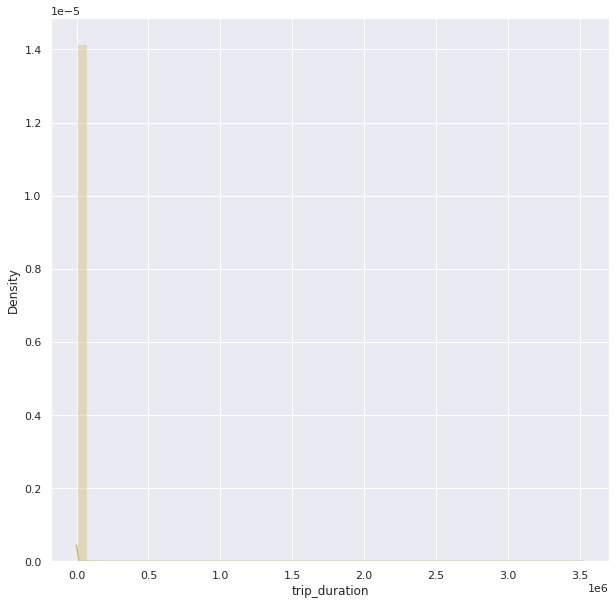

In [ ]:
#dependent variable trip duration
plt.figure(figsize=(10,10))
sns.distplot(df['trip_duration'],color="y")

So we can see there is some skweness in our data. Trip duration is left skewed so handling it by using log transformation to normalize the data.

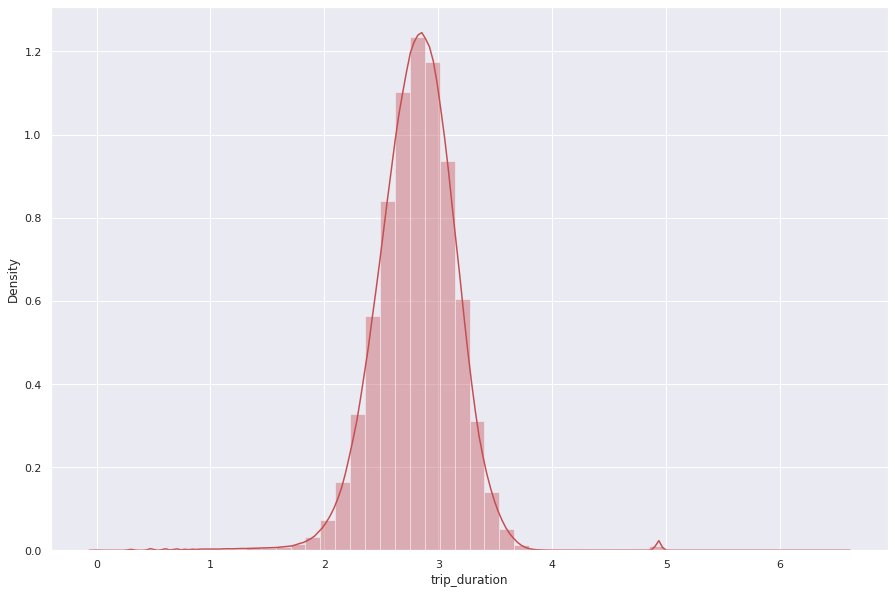

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['trip_duration']),color="R")

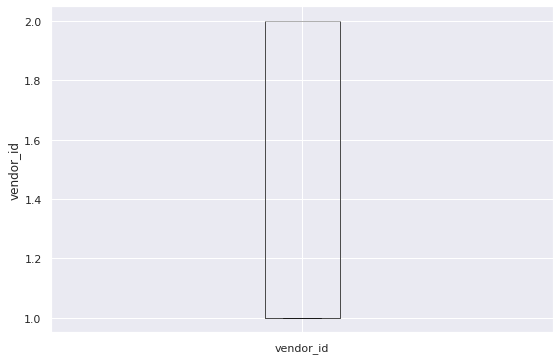

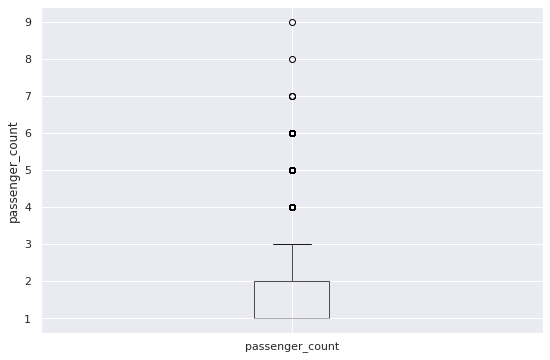

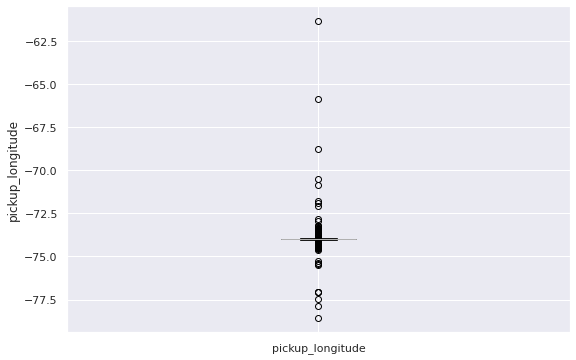

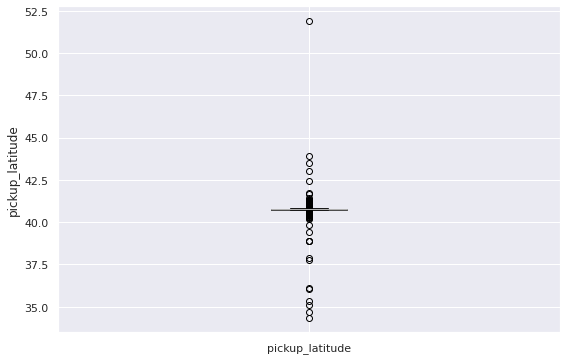

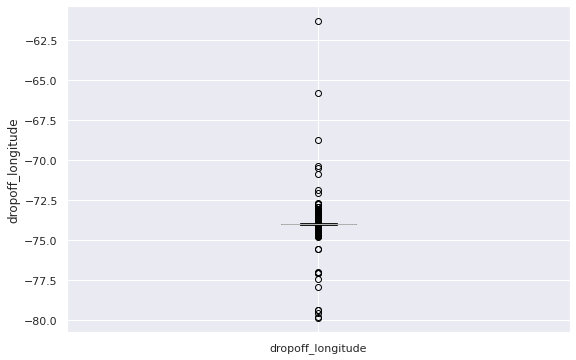

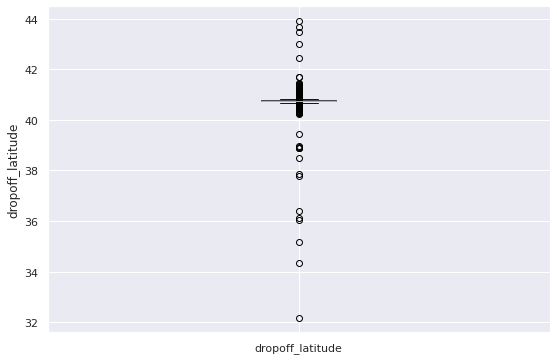

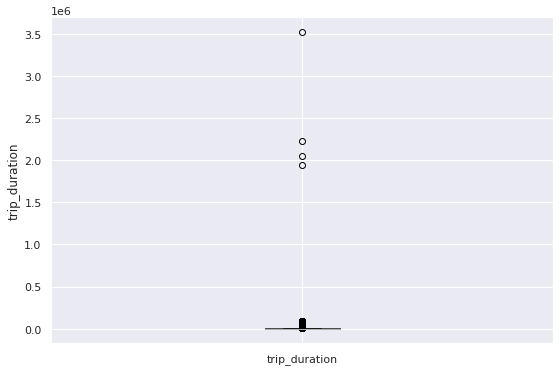

In [ ]:
# plot a boxplot for the label by each numerical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()


**OBSERVATIONS :**

1.Vendor ID has no outlier.

2.In passenger count 4 and more passengers are being treated as outliers.

3.pickup_longitude and pickup_latitude has outliers as well.

4.dropoff_longitude and dropoff_latitude has outliers too.

5.Our target variable trip_duration has alot of outliers

so Inorder to remove the outliers we use **IQR (INTERQUARTILE RANGE)**method.

In [ ]:
numeric_features=df.describe().columns

In [ ]:
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

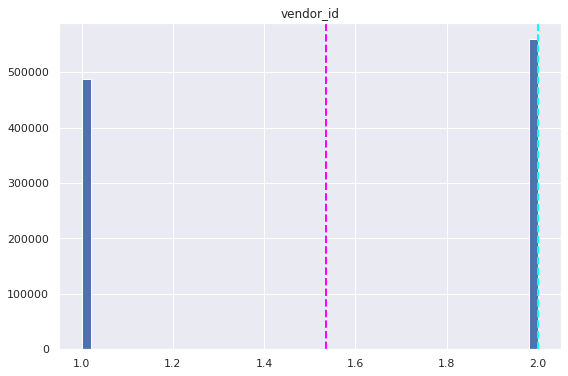

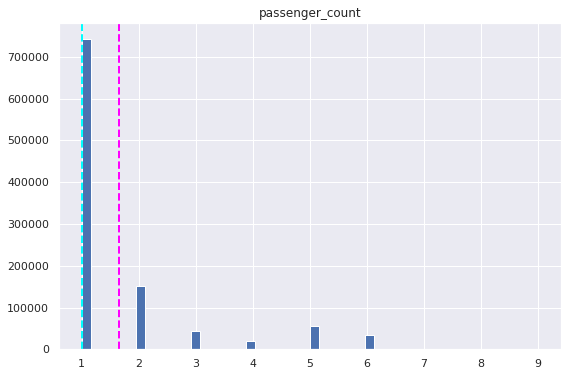

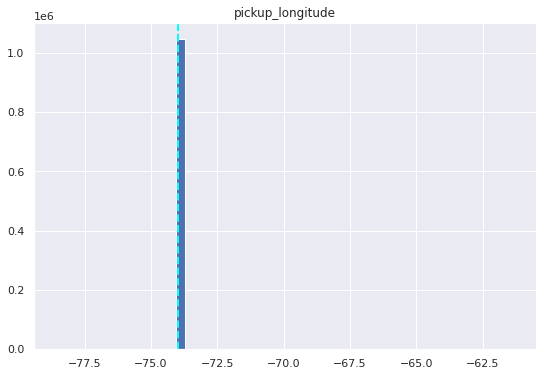

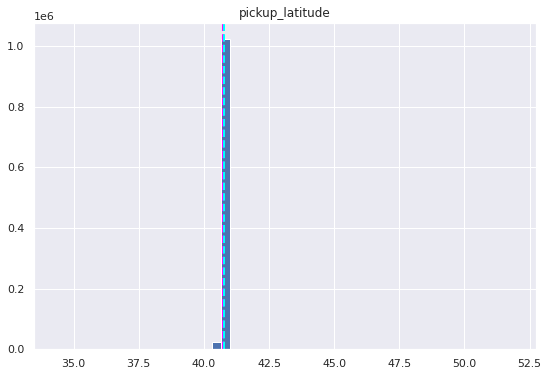

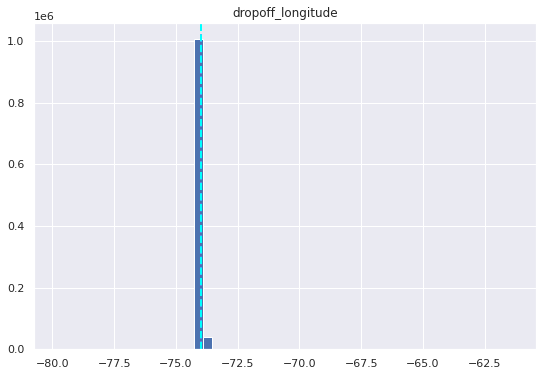

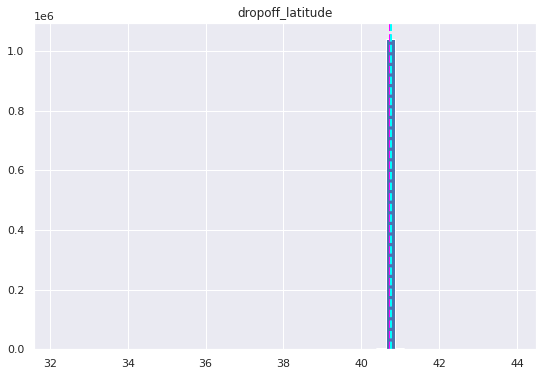

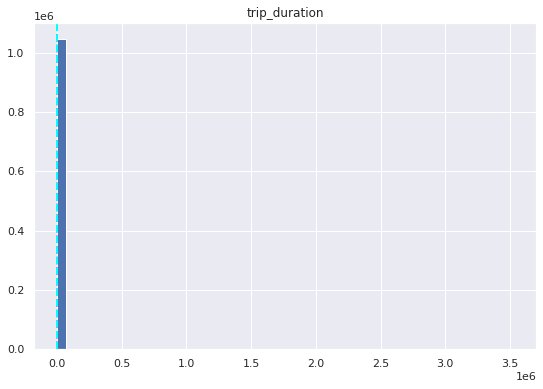

In [ ]:
# plotting a bargraph for each numerical set
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

For better understanding ,lets  now plot the scatter plot

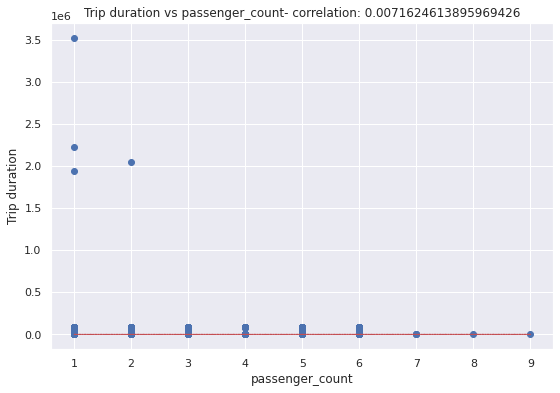

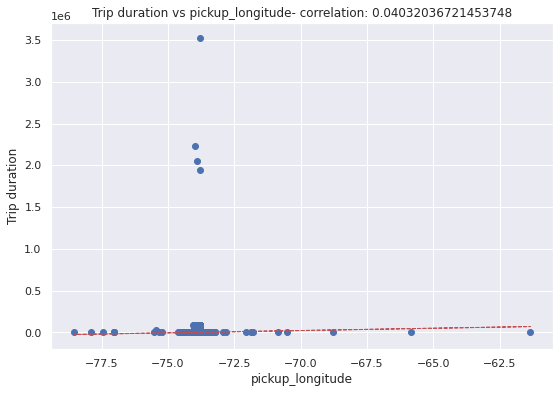

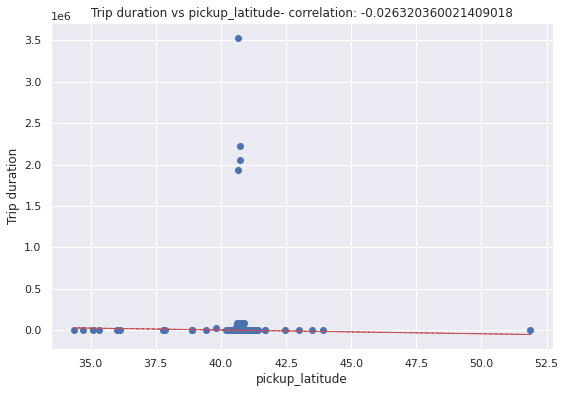

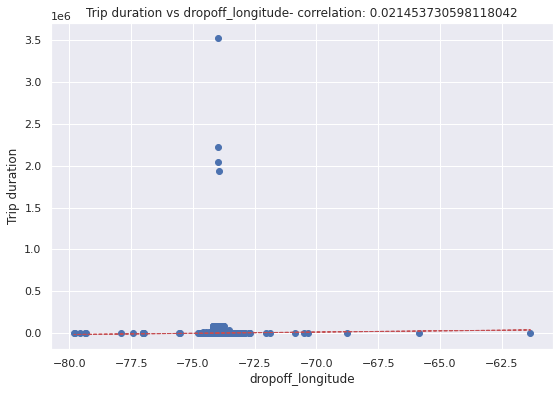

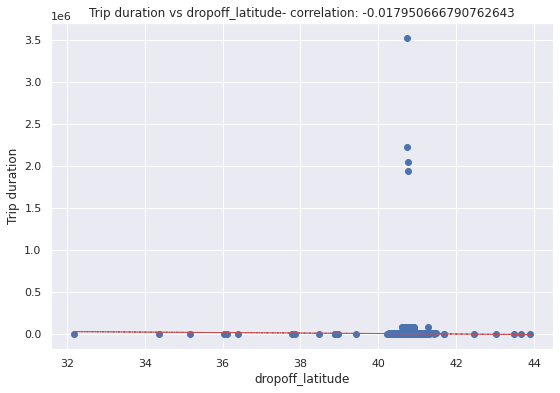

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

As we are doing with taxitrip dataset ,now lets start doing analysis with latitude and longitude which we have in our dataset..

Text(0.5, 1.0, 'Dropoff')

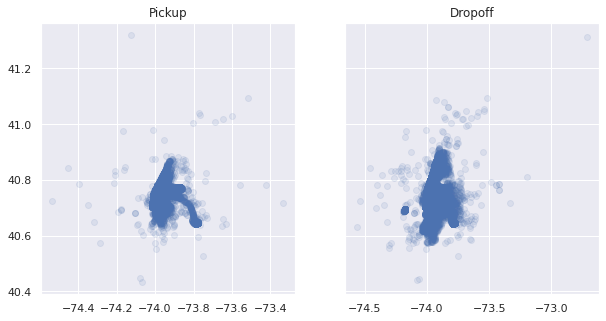

In [ ]:
#scatter plot of pickup and dropoff locations.
#plot to see the differences - minimal, but there is some change
n = 100000 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.scatter(df.pickup_longitude[:n], 
            df.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(df.dropoff_longitude[:n], 
            df.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

As we all love maps ...Let us try to atleast see what places were booked the most using our political and geographical maps

In [ ]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) & 
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

In [ ]:
nyc_map1 = plt.imread('/content/drive/MyDrive/nyc web p (1).jpg')
nyc_map2 = plt.imread('/content/drive/MyDrive/nyc map    jpg (1).webp')

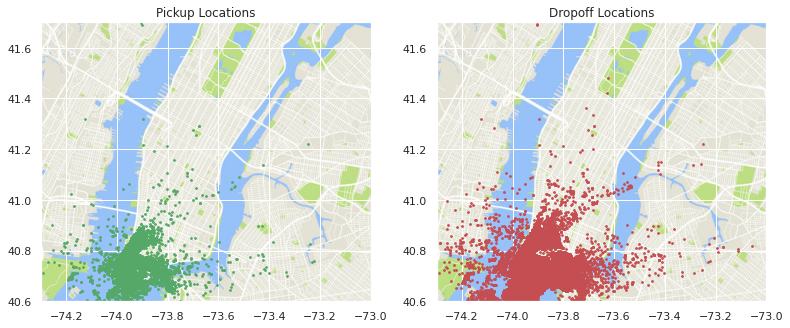

In [ ]:
df = df[select_within_boundingbox(df, BB)]
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(13, 8))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='g', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)
plot_on_map(df, BB, nyc_map1, s=3, alpha=1)

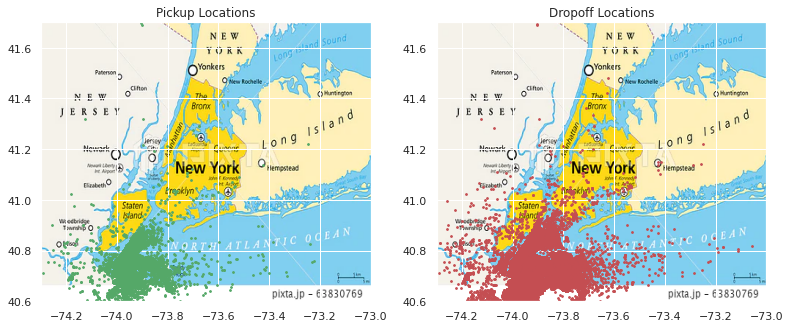

In [ ]:
#Plotting the pickup and drop off locations on political map (zoomed out)

plot_on_map(df, BB, nyc_map2, s=3, alpha=1)

So now we can confirm that its the data of NewYork itself not any other country.

In [ ]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in df.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)
display(mapa)

# FEATURE ENGINEERING 

As we have converted our date time column into manipulative form now let's make use of it to explore the data and let it help the model run better.

We will make new columns for days of the week of their corresponging pickup and drop-off day.

In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:00 2016-03-14 17:32:00   
1  id2377394          1 2016-12-06 00:43:00 2016-12-06 00:54:00   
2  id3858529          2 2016-01-19 11:35:00 2016-01-19 12:10:00   
3  id3504673          2 2016-06-04 19:32:00 2016-06-04 19:39:00   
4  id2181028          2 2016-03-26 13:30:00 2016-03-26 13:38:00   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663    Tuesday     Tuesday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429   Saturday    Saturday  
4         40.782520                  N            435   Saturday    Saturday

After this we will now let's try to visualise our data and see which day has been the busiest for our hard working taxi drivers.

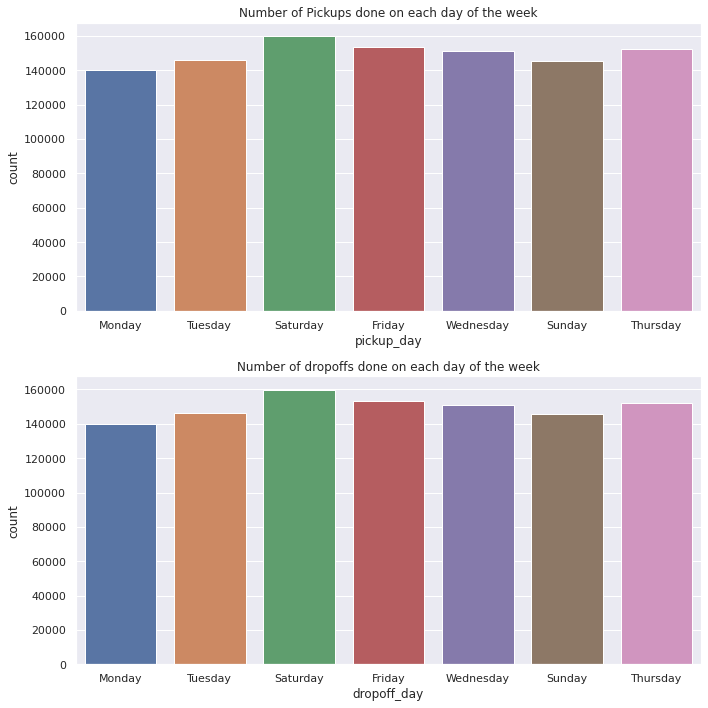

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

OBSERVATIONS:

From graphs we can observe that most trips were taken on saturday and least on monday..

It is common that everyone wants to enjoy on their weekends partying...and noone has the time to enjoy it on monday..

Now let's also try to figure out the time and see what time was the busiest and what is least busiest.

**The distribution of Pickup and Drop Off hours of the day**

The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones:

**1.Morning (4 hrs to 10 hrs)**

**2.Midday (10 hrs to 16 hrs)**

**3.Evening (16 hrs to 22 hrs)**

4**.Late night (22 hrs to 4 hrs**) 

In [ ]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [ ]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

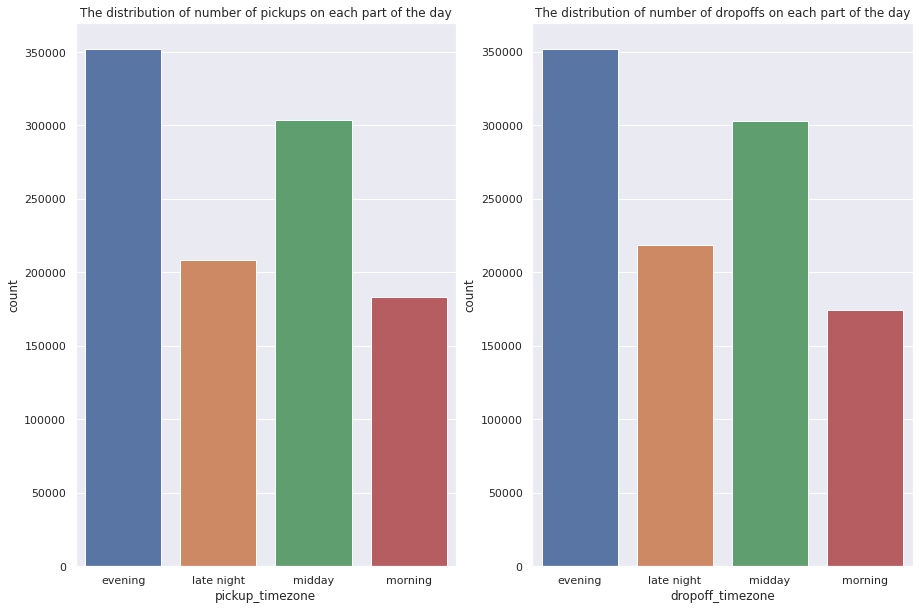

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()


we can observe that Taxi's were booked mostly in the** evening** and very less people were travelled in the** mid day**

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

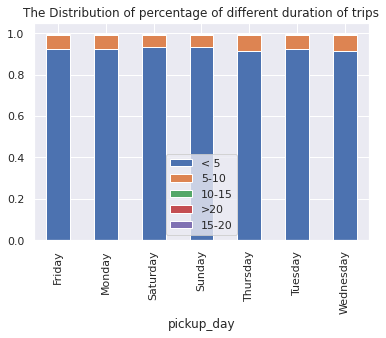

In [ ]:
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Now lets start working with the new variable.we know we have a longitude and latitude present so we will work on it to make a new feature that is distance.

**So making a new distance column from the latitude and longitude.**

In [ ]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [ ]:
df["distance"] = df.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

**IQR=Q3-Q1**

lower_limit_outlier=Q1-1.5*IQR 

upper_limit_outlier=Q3+1.5*IQR

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier.

remove the outlier present in distance 

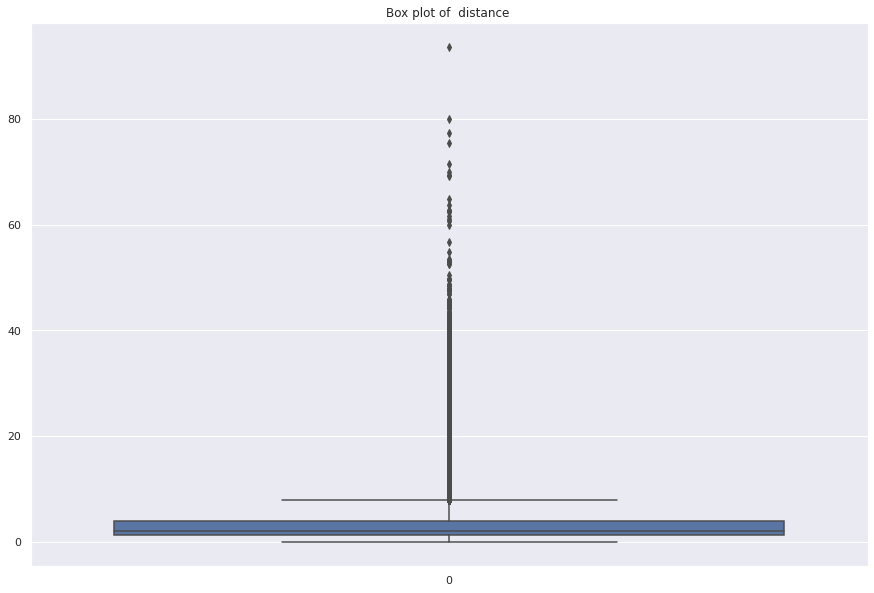

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=df['distance'], orient="v")


In [ ]:
percentile_q1 = np.percentile(df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['distance'],75)
print(percentile_q3)

1.2320312362178514
2.093372017886496
3.870330064641357


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.7254170064174073
Upper limit for outlier  : 7.827778307276615


In [ ]:
df=df[df['distance']>lower_limit_outlier]
df=df[df['distance']<upper_limit_outlier]

In [ ]:
df.shape

(946976, 17)

Now let's remove the outliers in trip_duration.

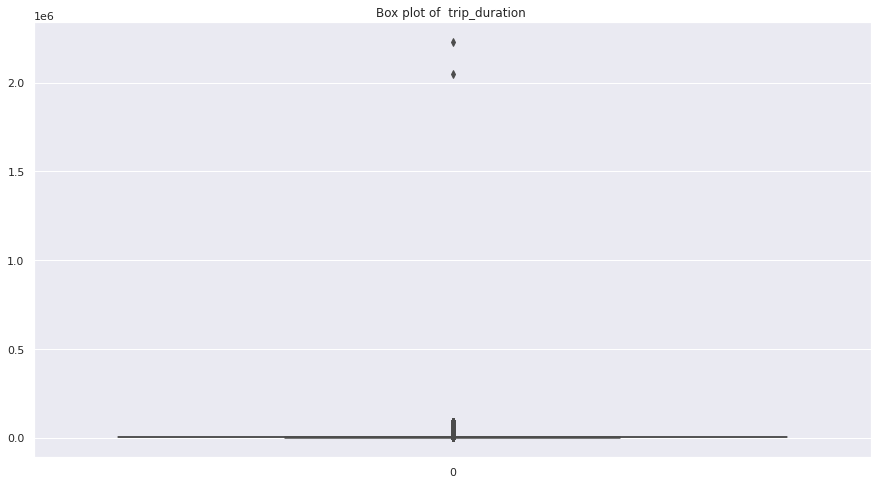

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=df['trip_duration'], orient="v")

In [ ]:
percentile_q1_trip_duration = np.percentile(df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(df['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [ ]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [ ]:
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<upper_limit_outlier_trip_duration]

In [ ]:
df.shape

(917794, 17)

Now let's remove the outlier present in the passenger_count.

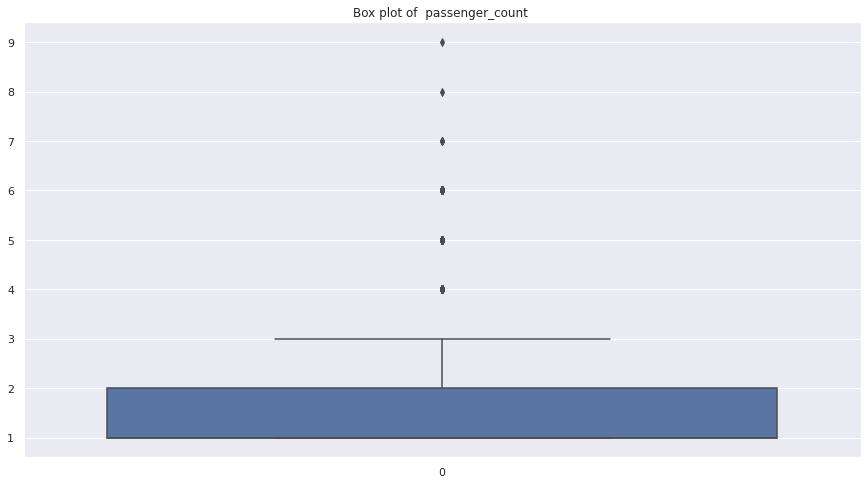

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=df['passenger_count'], orient="v")

In [ ]:
percentile_q1_passenger_count = np.percentile(df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [ ]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr
print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<upper_limit_outlier_passenger_count]

In [ ]:
df.shape

(820918, 17)

In [ ]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:00 2016-03-14 17:32:00   
1  id2377394          1 2016-12-06 00:43:00 2016-12-06 00:54:00   
3  id3504673          2 2016-06-04 19:32:00 2016-06-04 19:39:00   
4  id2181028          2 2016-03-26 13:30:00 2016-03-26 13:38:00   
7  id1324603          2 2016-05-21 07:54:00 2016-05-21 08:20:00   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  \
0         40.765602                  N            455     Monday      Monday   
1         40.731152                  N            663    Tuesday     Tuesday   
3         40.706718                  N            429   Saturday    Saturday   
4         40.782520                  N            435   Saturday    Saturday   
7         40.760559                  N           1551   Saturday    Saturday   

  duration_time pickup_timezone dropoff_timezone  distance  
0           < 5         evening          evening  1.498991  
1           < 5      late night       late night  1.806074  
3           < 5         evening          evening  1.485965  
4           < 5          midday           midday  1.188963  
7           < 5         morning          morning  5.716775

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
df['Day']=df['pickup_datetime'].dt.day_name()

In [ ]:
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["day_num"] = df["pickup_datetime"].apply(lambda x: x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["minute"] = df["pickup_datetime"].apply(lambda x: x.minute)

Finally let's start picking up the pace and do more feature engineering :

1.Converting trip duration into hours.
2.Taking log of our distance for normalisation of data.
3.Taking log of our trip duration as well to normalize it's data too.

In [ ]:
df['trip_duration_hour']=df['trip_duration']/3600
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)

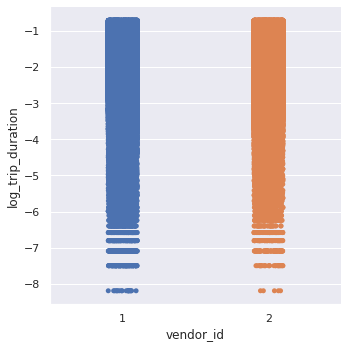

In [ ]:
sns.catplot(x="vendor_id", y="log_trip_duration",kind="strip",data=df)

***Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips***

So now let's plot the relatioship of store_and_fwd_flag and our trip_duration

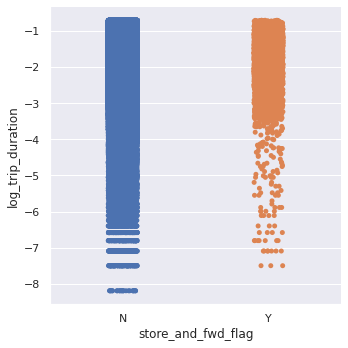

In [ ]:
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=df)

Now let's make some verses graph and plot the distance time graph

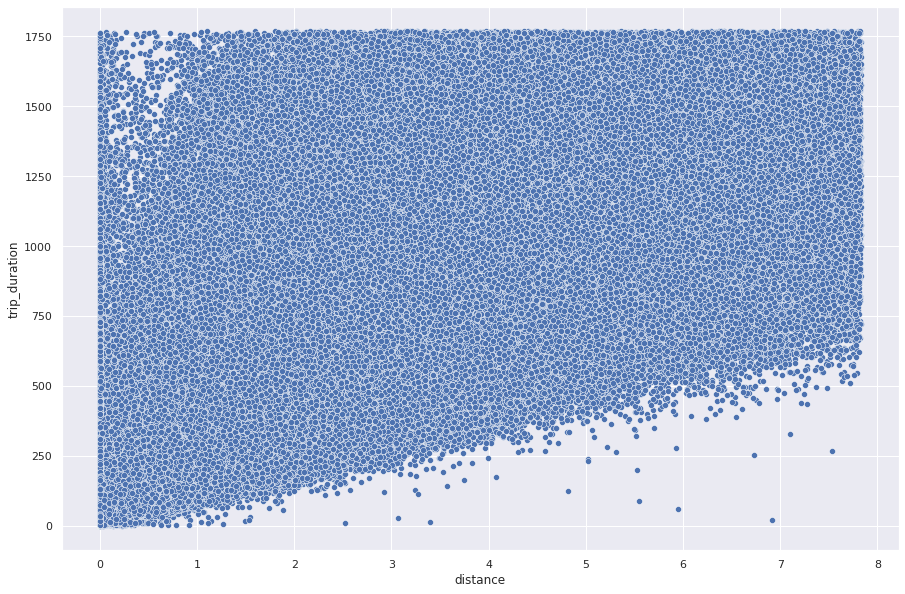

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=df)

Okay this seems a bit disappointing so let's use the normalized data instead and use log features we added earlier to have a normalized data graph of trip duration and distance

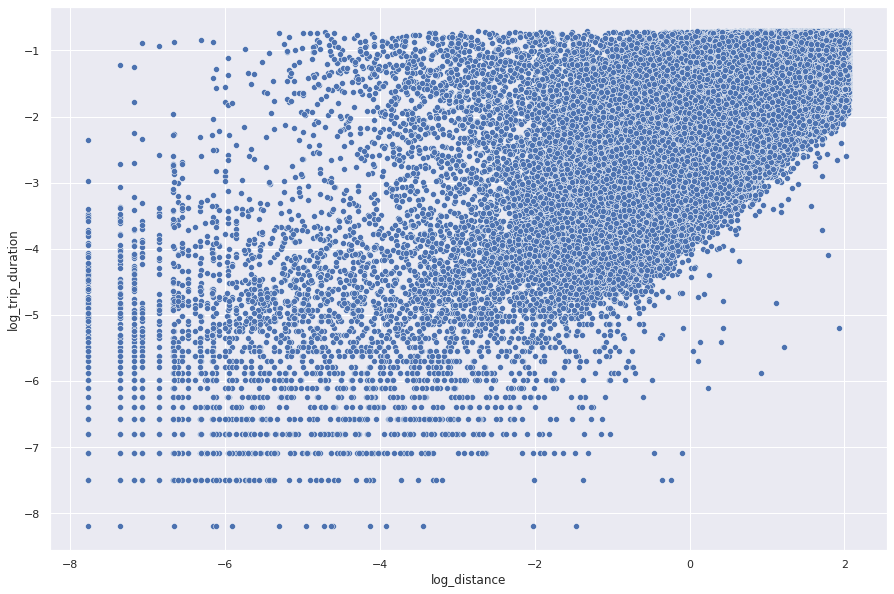

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

Now we can clearly see the difference between the original data and our normalized data.

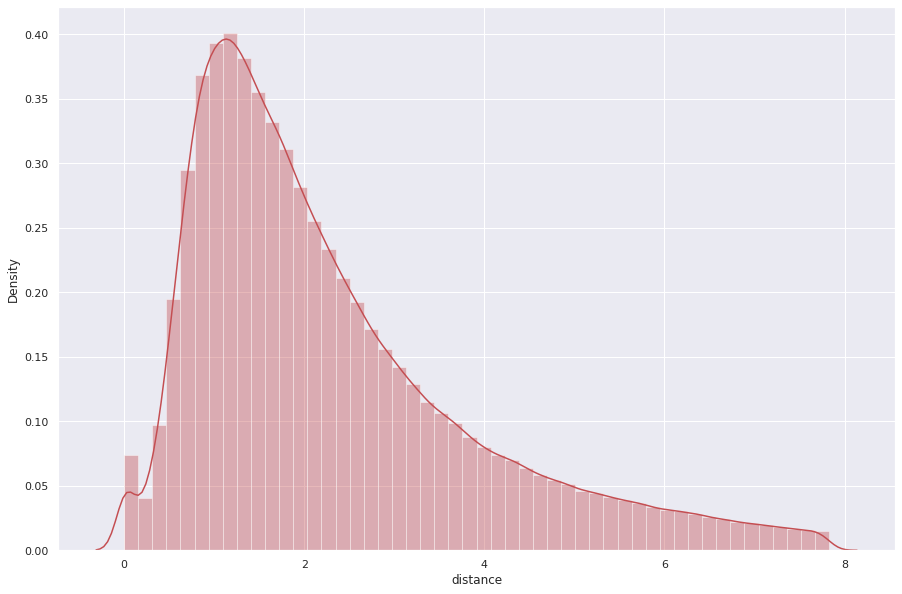

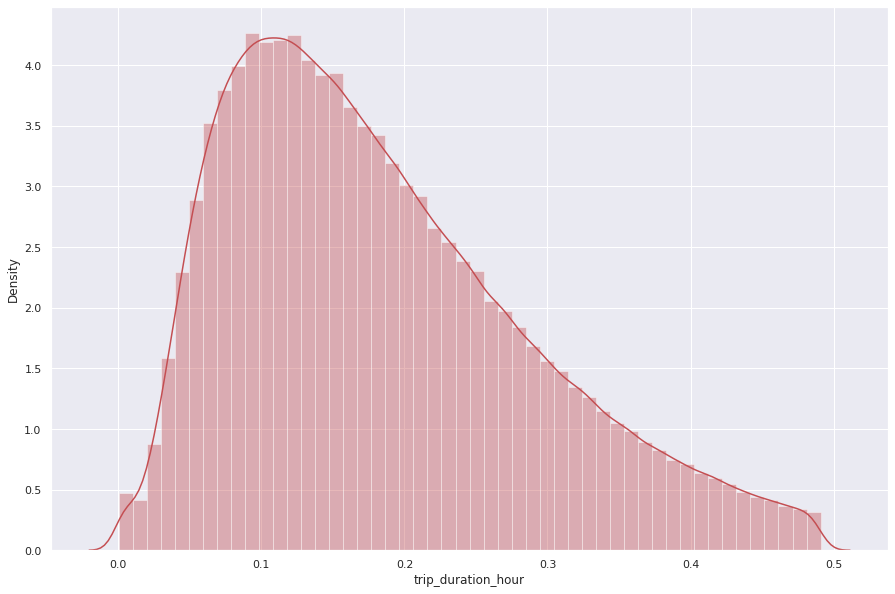

In [ ]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(df[i],color="R")

So for now we have only been focusing on mostly numerical features, now let's turn our gaze upon the categorical features too..

# **One Hot Encoding**

In [ ]:
df= pd.get_dummies(df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [ ]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:00 2016-03-14 17:32:00   
1  id2377394          1 2016-12-06 00:43:00 2016-12-06 00:54:00   
3  id3504673          2 2016-06-04 19:32:00 2016-06-04 19:39:00   
4  id2181028          2 2016-03-26 13:30:00 2016-03-26 13:38:00   
7  id1324603          2 2016-05-21 07:54:00 2016-05-21 08:20:00   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  ... log_trip_duration  \
0         40.765602            455  ...         -2.068392   
1         40.731152            663  ...         -1.691914   
3         40.706718            429  ...         -2.127232   
4         40.782520            435  ...         -2.113343   
7         40.760559           1551  ...         -0.842034   

  store_and_fwd_flag_N store_and_fwd_flag_Y Day_Friday Day_Monday  \
0                    1                    0          0          1   
1                    1                    0          0          0   
3                    1                    0          0          0   
4                    1                    0          0          0   
7                    1                    0          0          0   

   Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday  
0             0           0             0            0              0  
1             0           0             0            1              0  
3             1           0             0            0              0  
4             1           0             0            0              0  
7             1           0             0            0              0  

[5 rows x 33 columns]

In [ ]:
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [ ]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_df=df[newdata]

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = df[features].apply(zscore)[:100000]
y=df['trip_duration_hour'][:100000]

In [ ]:
X[:5]

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0   1.027614        -0.473526         -0.120764         0.625028   
1  -0.973128        -0.473526         -0.043751        -0.604953   
3   1.027614        -0.473526         -1.355317        -1.383515   
4   1.027614        -0.473526          0.282198         1.683291   
7   1.027614        -0.473526          0.449394         1.874657   

   dropoff_longitude  dropoff_latitude  distance     month      hour  \
0           0.540652          0.466138 -0.506470 -0.582527  0.526177   
1          -0.917758         -0.837862 -0.311458  2.473202 -2.138692   
3          -1.452849         -1.762690 -0.514742  0.436049  0.839691   
4           0.193609          1.106514 -0.703352 -0.582527 -0.100851   
7           2.304919          0.275252  2.172009  0.096524 -1.041393   

     minute  store_and_fwd_flag_N  store_and_fwd_flag_Y  Day_Friday  \
0 -0.325442              0.072903             -0.072903   -0.413425   
1  0.771375              0.072903             -0.072903   -0.413425   
3  0.136376              0.072903             -0.072903   -0.413425   
4  0.020921              0.072903             -0.072903   -0.413425   
7  1.406374              0.072903             -0.072903   -0.413425   

   Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  \
0    2.549103     -0.426076     -0.4013     -0.411704    -0.402517   
1   -0.392295     -0.426076     -0.4013     -0.411704     2.484370   
3   -0.392295      2.346999     -0.4013     -0.411704    -0.402517   
4   -0.392295      2.346999     -0.4013     -0.411704    -0.402517   
7   -0.392295      2.346999     -0.4013     -0.411704    -0.402517   

   Day_Wednesday  
0      -0.410058  
1      -0.410058  
3      -0.410058  
4      -0.410058  
7      -0.410058

# **Before Fitting data into our models lets split the into train and test dataset**

It is a fast and easy procedure to perform, the results of which allows us to compare the performance of our taxi trip duration prediction for.



In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


# LINEAR REGRESSION

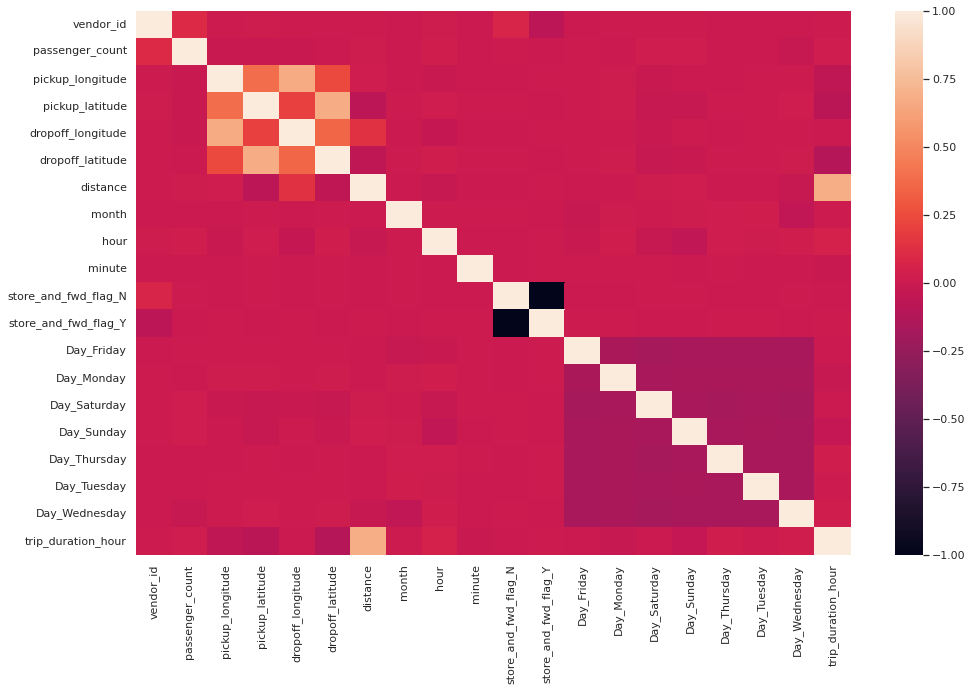

In [ ]:
plt.figure (figsize= (16,10))
sns.heatmap(trip_df.corr())

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.4874971461304666

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
#Train set metrics
Ltr_MSE  = mean_squared_error((y_train), (y_pred_train))
print("MSE :" , Ltr_MSE)

Ltr_RMSE = np.sqrt(Ltr_MSE)

print("RMSE :" ,Ltr_RMSE)

Ltr_r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,Ltr_r2)
Ltr_ar2 = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 : ",Ltr_ar2)

MSE : 0.005640008417446791
RMSE : 0.07509998946369294
R2 : 0.4874971461304666
Adjusted R2 :  0.4873753962652063


In [ ]:
#Test set metrics
Lte_MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , Lte_MSE)

Lte_RMSE = np.sqrt(Lte_MSE)
print("RMSE :" ,Lte_RMSE)

Lte_r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,Lte_r2)
Lte_ar2 = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Lte_ar2)

MSE : 0.005585290140116888
RMSE : 0.07473479872266257
R2 : 0.49033303940382356
Adjusted R2 :  0.4898483711229764


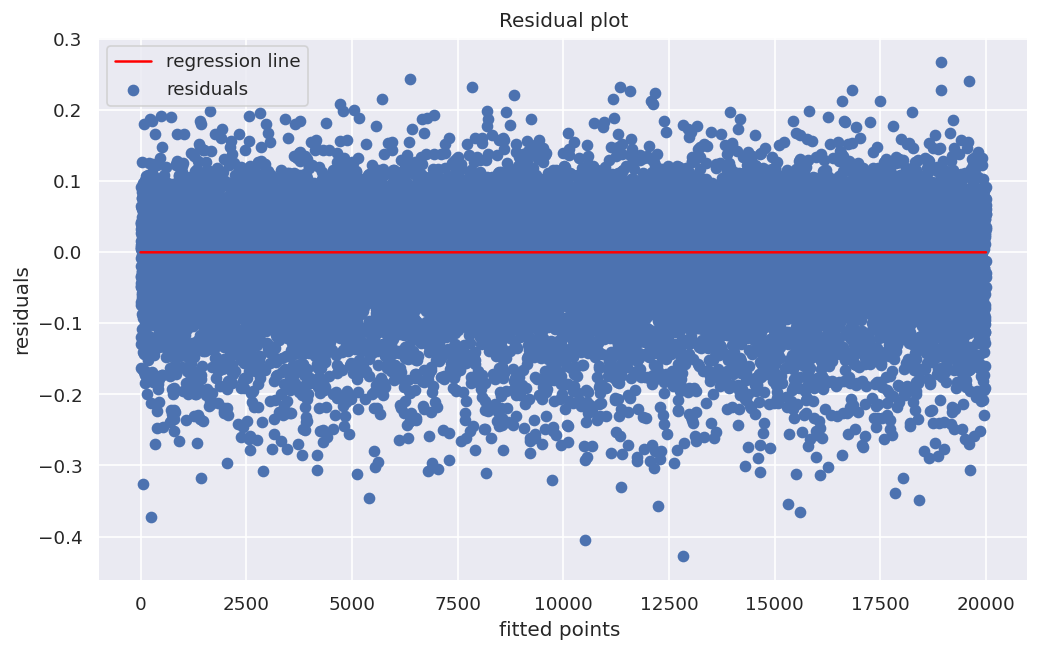

In [ ]:
#Heteroskedasticity
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

# DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.5926809737842431

In [ ]:
dt_grid.best_score_

0.5926809737842431

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10)

In [ ]:
dt_optimal_model =dt_grid.best_estimator_

In [ ]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [ ]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

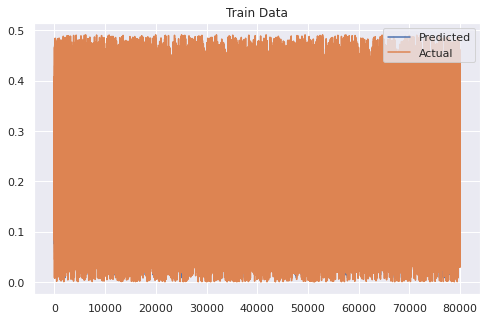

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_dt_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.004074201895070219
Train RMSE : 0.06382947512764162
Train R2 : 0.6297806769215079
Train Adjusted R2 :  0.6296927278450076


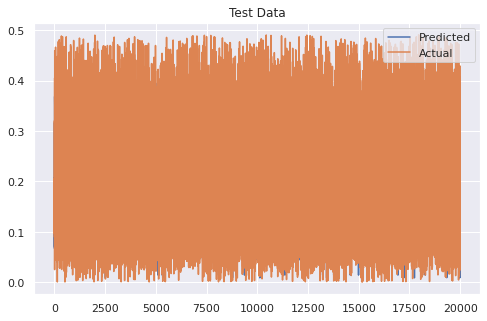

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_dt_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.004418982852936084
Test RMSE : 0.06647543044566229
Test R2 : 0.5967605078551173
Test Adjusted R2 :  0.5963770468766012


In [ ]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [ ]:
dt_optimal_model.feature_importances_

array([1.13875466e-03, 1.29290043e-04, 1.29888530e-02, 1.14895520e-02,
       1.58362015e-02, 5.42195503e-02, 8.10388319e-01, 1.20656738e-03,
       8.61331831e-02, 1.61606667e-03, 0.00000000e+00, 0.00000000e+00,
       1.38564166e-04, 7.45435884e-05, 1.13533378e-03, 1.86211731e-03,
       7.46464261e-04, 5.07734846e-05, 8.45865753e-04])

In [ ]:
importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

Feature  Feature Importance
0              vendor_id                0.00
1        passenger_count                0.00
2       pickup_longitude                0.01
3        pickup_latitude                0.01
4      dropoff_longitude                0.02
5       dropoff_latitude                0.05
6               distance                0.81
7                  month                0.00
8                   hour                0.09
9                 minute                0.00
10  store_and_fwd_flag_N                0.00
11  store_and_fwd_flag_Y                0.00
12            Day_Friday                0.00
13            Day_Monday                0.00
14          Day_Saturday                0.00
15            Day_Sunday                0.00
16          Day_Thursday                0.00
17           Day_Tuesday                0.00
18         Day_Wednesday                0.00

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance                0.81
8                   hour                0.09
5       dropoff_latitude                0.05
4      dropoff_longitude                0.02
2       pickup_longitude                0.01
3        pickup_latitude                0.01
0              vendor_id                0.00
13            Day_Monday                0.00
17           Day_Tuesday                0.00
16          Day_Thursday                0.00
15            Day_Sunday                0.00
14          Day_Saturday                0.00
9                 minute                0.00
12            Day_Friday                0.00
11  store_and_fwd_flag_Y                0.00
10  store_and_fwd_flag_N                0.00
1        passenger_count                0.00
7                  month                0.00
18         Day_Wednesday                0.00

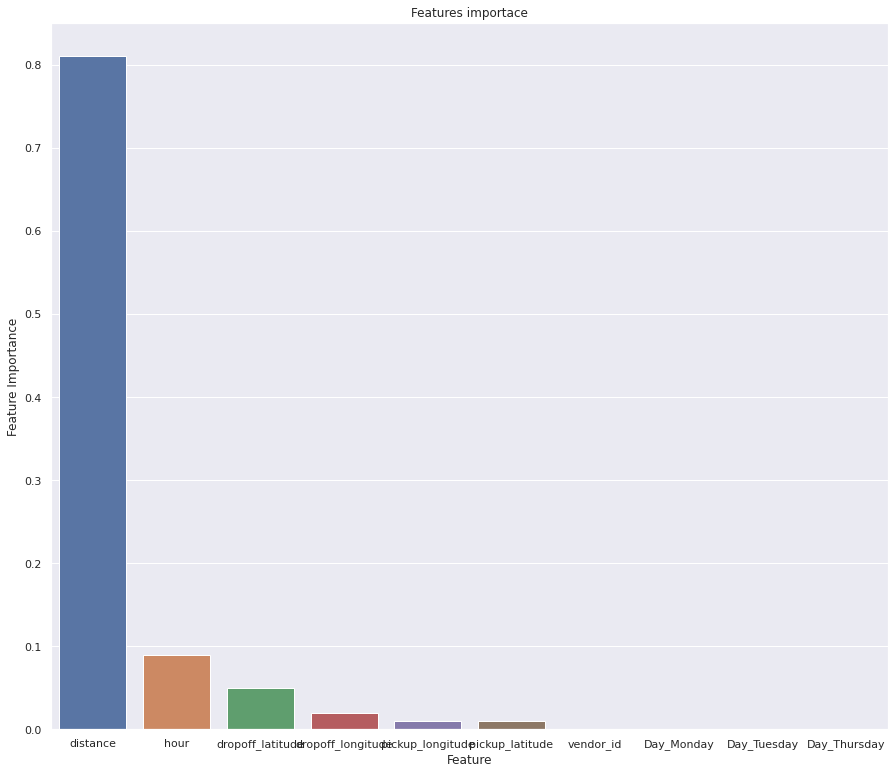

In [ ]:
plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

**Visualising the DT**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

# APPLYING LASSO REGRESSION 

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
lasso_regressor.score(X_train, y_train)

0.48750258103991373

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  0.48718881935902464


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

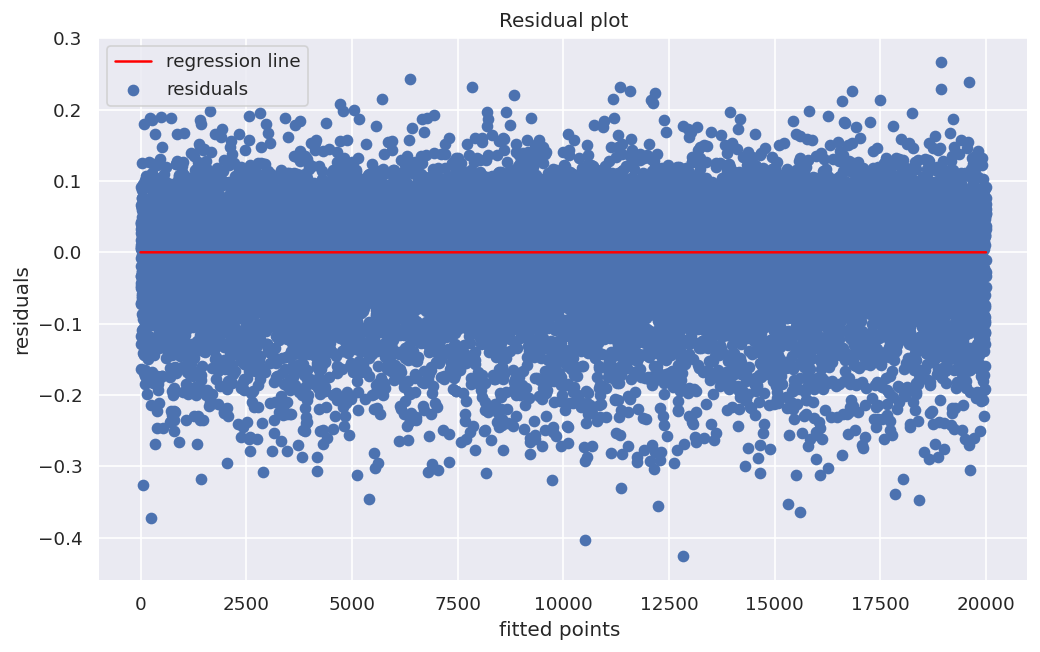

In [ ]:
#Heteroskedasticity
residuals=y_pred_lasso-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

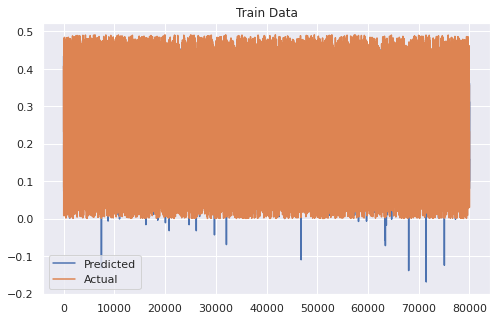

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_lasso_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.005639948607174909
Train RMSE : 0.07509959125837443
Train R2 : 0.48750258103991373
Train Adjusted R2 :  0.48738083246576724


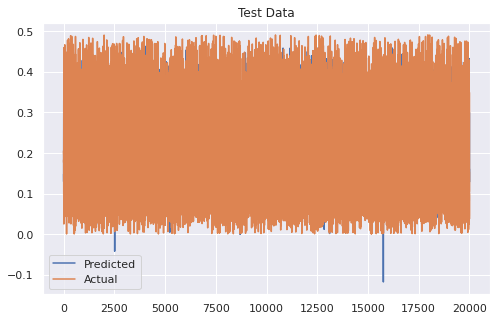

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.005586654674653299
Test RMSE : 0.07474392734298418
Test R2 : 0.49020852337111
Test Adjusted R2 :  0.48972373668162306


# **Applying Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
ridge_regressor.score(X_train, y_train)

0.4875214596688937

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  0.48718881935902464


In [ ]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

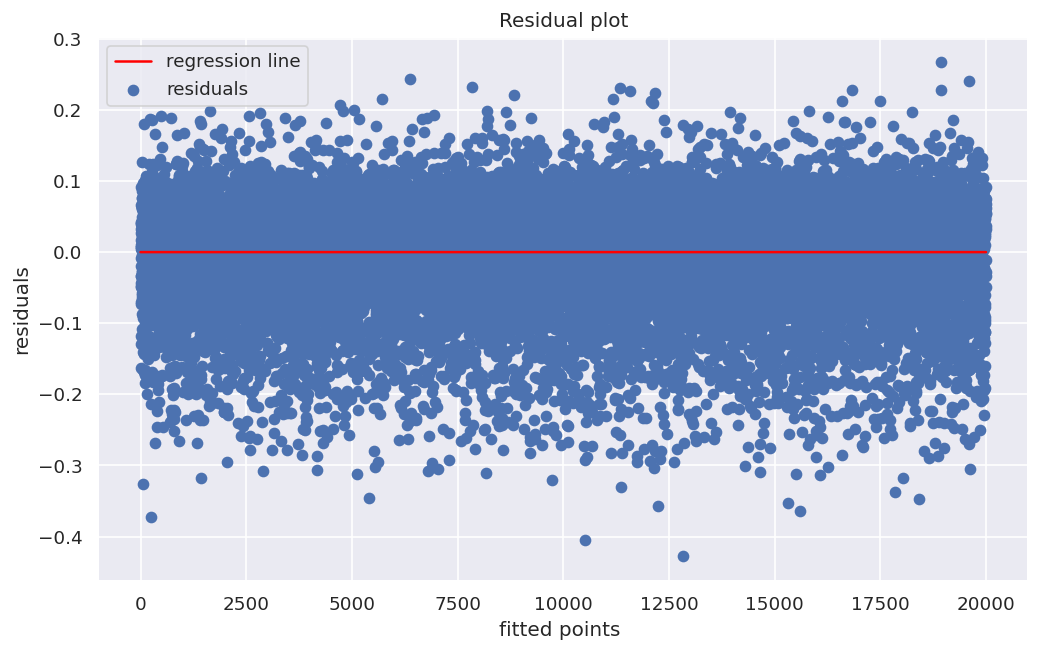

In [ ]:
#Heteroskedasticity
residuals=y_pred_ridge_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()


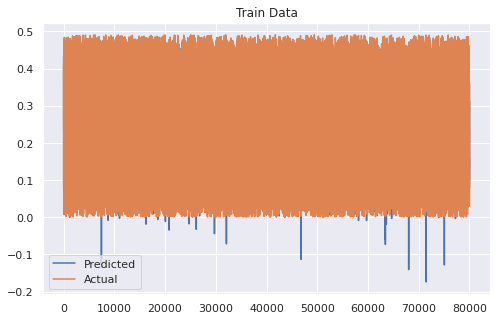

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_ridge_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.0056397408510120844
Train RMSE : 0.07509820804128474
Train R2 : 0.4875214596688937
Train Adjusted R2 :  0.48739971557954276


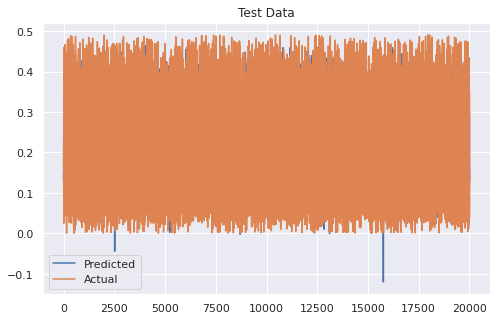

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Test Data")
plt.plot(y_pred_ridge_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.005585835657879258
Test RMSE : 0.07473844832400027
Test R2 : 0.49028326000599043
Test Adjusted R2 :  0.4897985443873776


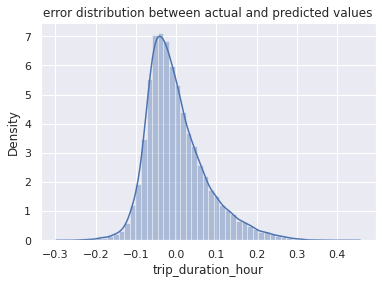

In [ ]:
sns.distplot(y_test - y_pred_ridge_test ).set_title("error distribution between actual and predicted values")
plt.show()

# **Applying GradientBoosting Algorithm**

In [ ]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  24.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  24.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  23.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  28.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  30.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  27.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.5s
[CV] END max_depth=5,

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=2)

In [ ]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 120}

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=80, n_estimators=120)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
y_preds_gb = gb_optimal_model.predict(X_test)
y_pred_gb_train=gb_optimal_model.predict(X_train)

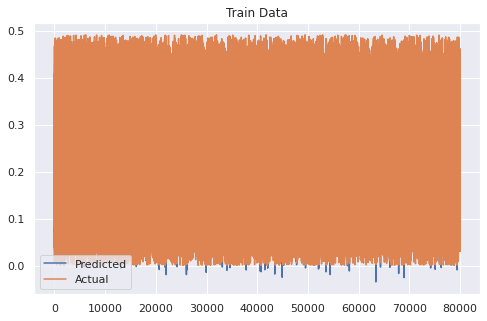

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_gb_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_gb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_gb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_gb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.002464880040148696
Train RMSE : 0.0496475582496128
Train R2 : 0.7760184096331316
Train Adjusted R2 :  0.775965200703187


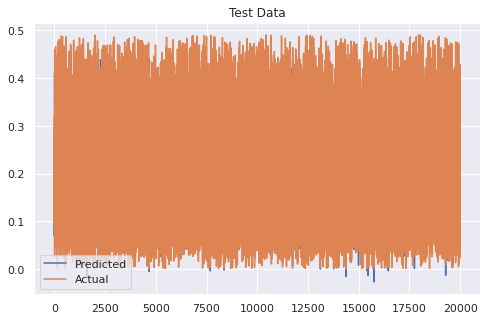

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_preds_gb)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_preds_gb)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_preds_gb)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_preds_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.0034093116096387895
Test RMSE : 0.05838931074810517
Test R2 : 0.6888946783034093
Test Adjusted R2 :  0.6885988324018961


In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = importance_df['Feature Importance']
importance_df

Feature  Feature Importance
0              vendor_id            0.001934
1        passenger_count            0.000746
2       pickup_longitude            0.044680
3        pickup_latitude            0.037090
4      dropoff_longitude            0.046692
5       dropoff_latitude            0.073994
6               distance            0.672434
7                  month            0.011815
8                   hour            0.084714
9                 minute            0.007777
10  store_and_fwd_flag_N            0.000000
11  store_and_fwd_flag_Y            0.000000
12            Day_Friday            0.000808
13            Day_Monday            0.001504
14          Day_Saturday            0.004581
15            Day_Sunday            0.004483
16          Day_Thursday            0.002201
17           Day_Tuesday            0.001235
18         Day_Wednesday            0.003311

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.672434
8                   hour            0.084714
5       dropoff_latitude            0.073994
4      dropoff_longitude            0.046692
2       pickup_longitude            0.044680
3        pickup_latitude            0.037090
7                  month            0.011815
9                 minute            0.007777
14          Day_Saturday            0.004581
15            Day_Sunday            0.004483
18         Day_Wednesday            0.003311
16          Day_Thursday            0.002201
0              vendor_id            0.001934
13            Day_Monday            0.001504
17           Day_Tuesday            0.001235
12            Day_Friday            0.000808
1        passenger_count            0.000746
11  store_and_fwd_flag_Y            0.000000
10  store_and_fwd_flag_N            0.000000

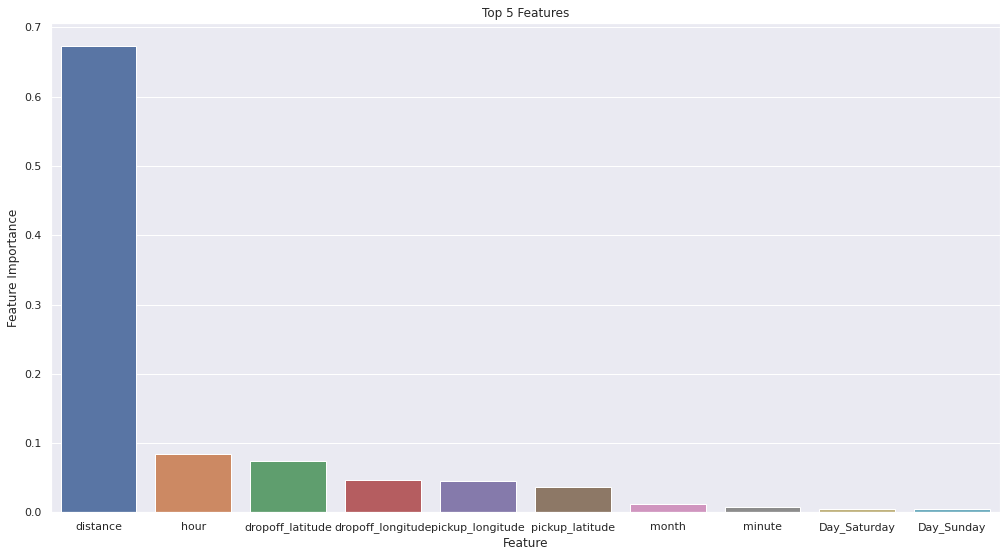

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

# **Applying XGBRegressor algorithm**

In [ ]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [ ]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[07:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.7s
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.5s
[07:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.6s
[07:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   7.1s
[07:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
xgb_grid.best_score_

0.6782185911127563

In [ ]:
xgb_grid.best_score_

0.6782185911127563

In [ ]:
xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

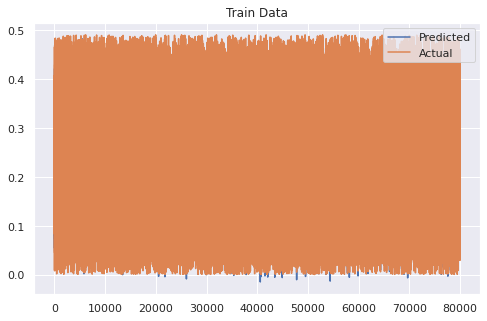

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_xgb_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()


In [ ]:
MSE  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.0021932242065095587
Train RMSE : 0.04683187169556176
Train R2 : 0.800703548325423
Train Adjusted R2 :  0.8006562035819644


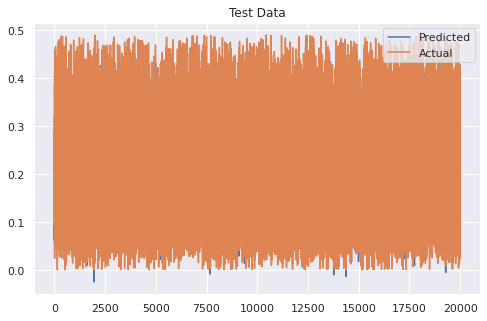

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_xgb_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.003418522468085611
Test RMSE : 0.0584681320728276
Test R2 : 0.6880541722399276
Test Adjusted R2 :  0.687757527058374


In [ ]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [ ]:
xgb_optimal_model.feature_importances_

array([0.00659699, 0.00693526, 0.02324435, 0.02369026, 0.02782121,
       0.04661193, 0.50562316, 0.02132336, 0.09229266, 0.01249676,
       0.008828  , 0.        , 0.0158656 , 0.02234982, 0.03525088,
       0.05112699, 0.03261438, 0.02210536, 0.04522303], dtype=float32)

In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

Feature  Feature Importance
0              vendor_id                0.01
1        passenger_count                0.01
2       pickup_longitude                0.02
3        pickup_latitude                0.02
4      dropoff_longitude                0.03
5       dropoff_latitude                0.05
6               distance                0.51
7                  month                0.02
8                   hour                0.09
9                 minute                0.01
10  store_and_fwd_flag_N                0.01
11  store_and_fwd_flag_Y                0.00
12            Day_Friday                0.02
13            Day_Monday                0.02
14          Day_Saturday                0.04
15            Day_Sunday                0.05
16          Day_Thursday                0.03
17           Day_Tuesday                0.02
18         Day_Wednesday                0.05

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)

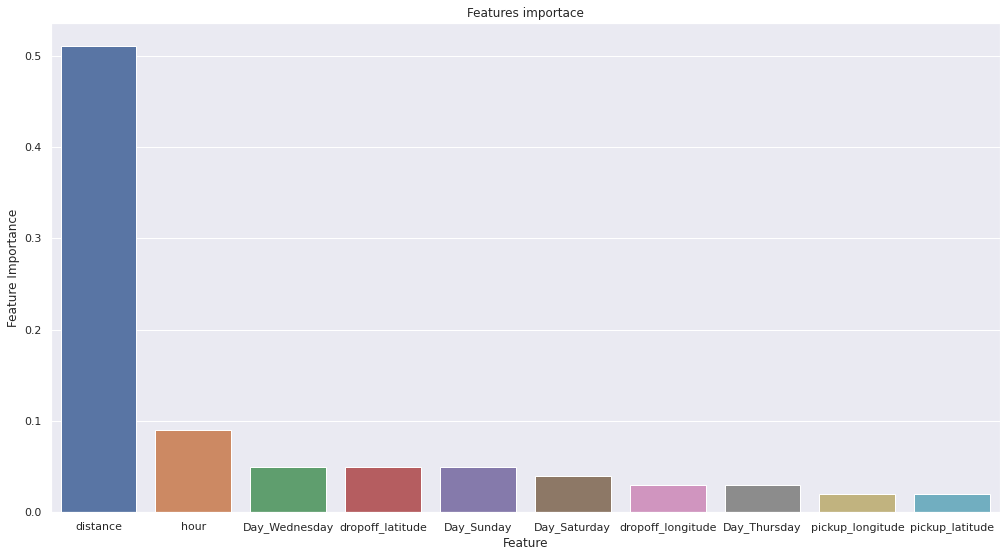

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

# **Model Summary For Train Data**

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.005640008417446791','0.07509998946369294','0.4874971461304666','0.4873753962652063'])
train.add_row(['2','Lasso Regression','0.005639948607174909','0.07509959125837443','0.48750258103991373','0.48738083246576724'])
train.add_row(['3','Ridge Regression ','0.0056397408510120844',' 0.07509820804128474','0.4875214596688937','0.48739971557954276'])
train.add_row(['4','DecisionTree Regressor','0.004074201895070219',' 0.06382947512764162','0.6297806769215079','0.6296927278450076'])
train.add_row(['5','XGBRegressor','0.0021932242065095587',': 0.04683187169556176','0.800703548325423','0.8006562035819644'])
train.add_row(['6','GradientBoosting','0.002464880040148696','0.0496475582496128','0.7760184096331316','0.775965200703187'])
print(train)

+-------+------------------------+-----------------------+-----------------------+---------------------+---------------------+
| SL NO |       MODEL_NAME       |       Train MSE       |       Train RMSE      |      Train R^2      |  Train Adjusted R^2 |
+-------+------------------------+-----------------------+-----------------------+---------------------+---------------------+
|   1   |   Linear Regression    |  0.005640008417446791 |  0.07509998946369294  |  0.4874971461304666 |  0.4873753962652063 |
|   2   |    Lasso Regression    |  0.005639948607174909 |  0.07509959125837443  | 0.48750258103991373 | 0.48738083246576724 |
|   3   |   Ridge Regression     | 0.0056397408510120844 |   0.07509820804128474 |  0.4875214596688937 | 0.48739971557954276 |
|   4   | DecisionTree Regressor |  0.004074201895070219 |   0.06382947512764162 |  0.6297806769215079 |  0.6296927278450076 |
|   5   |      XGBRegressor      | 0.0021932242065095587 | : 0.04683187169556176 |  0.800703548325423  |  0.800

# **Model Summary For Test Data**

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.005585290140116888',' 0.07473479872266257','0.49033303940382356','0.4898483711229764'])
test.add_row(['2','Lasso Regression','0.005586654674653299','0.07474392734298418','0.49020852337111','0.48972373668162306'])
test.add_row(['3','Ridge Regression ',': 0.005585835657879258','0.07473844832400027','0.49028326000599043','0.4897985443873776'])
test.add_row(['4','DecisionTree Regressor','0.004418982852936084','0.06647543044566229','0.5967605078551173','0.5963770468766012'])
test.add_row(['5','XGBRegressor','0.003418522468085611','0.0584681320728276','0.6880541722399276','0.687757527058374'])
test.add_row(['6','GradientBoosting','0.0034093116096387895','0.05838931074810517','0.6888946783034093',' 0.688598832401896'])
print(test)

+-------+------------------------+------------------------+----------------------+---------------------+---------------------+
| SL NO |       MODEL_NAME       |        Test MSE        |      Test RMSE       |       Test R^2      |  Test Adjusted R^2  |
+-------+------------------------+------------------------+----------------------+---------------------+---------------------+
|   1   |   Linear Regression    |  0.005585290140116888  |  0.07473479872266257 | 0.49033303940382356 |  0.4898483711229764 |
|   2   |    Lasso Regression    |  0.005586654674653299  | 0.07474392734298418  |   0.49020852337111  | 0.48972373668162306 |
|   3   |   Ridge Regression     | : 0.005585835657879258 | 0.07473844832400027  | 0.49028326000599043 |  0.4897985443873776 |
|   4   | DecisionTree Regressor |  0.004418982852936084  | 0.06647543044566229  |  0.5967605078551173 |  0.5963770468766012 |
|   5   |      XGBRegressor      |  0.003418522468085611  |  0.0584681320728276  |  0.6880541722399276 |  0.687

# **From this table we conclude that GradientBoosting perform  well for our dataset**